# Coursework - Machine Learning

In this coursework we will explore some of the ideas from the session on Machine Learning. You will work with some randomly generated data and try out some approaches to supervised learning.

## Setup

In [107]:
import numpy as np  
import scipy as sp
import sklearn

import matplotlib.pyplot as plt
%matplotlib inline

Please enter your Student ID in the cell below. This ID will be used throughout the coursework so please do not create any other variables named `ID`.

In [109]:
ID = 10750235

## Part 1 - Exploring the SVM

In [111]:
np.random.seed(ID)
clustercentres = np.array([[0.5,0.65],[0.35,0.4]])
centreshifts = np.random.random((2,2))*0.02
clustercentres = clustercentres + centreshifts

noisescale = 0.25
nclasses = 2
npoints = 100
data = np.zeros((nclasses*npoints,2), dtype=float)
classes = np.zeros(nclasses*npoints, dtype=int)
for i in range(nclasses):
    for j in range(npoints):
        randomshift = np.random.random((2,))
        data[i*npoints+j,:] = clustercentres[i,:] + noisescale*randomshift[0]*np.array([np.sin(randomshift[1]*2*np.pi),np.cos(randomshift[1]*2*np.pi)])
        classes[i*npoints+j] = i

The data produced by the above cell consists of two clusters representing two classes of observations. The points in each cluster include some random noise.

#### <span style="color: red"> Task 1a:</span> Produce a scatter plot of your data with a different colour for each class (2 marks)

In [113]:
from sklearn.cluster import KMeans
nclusters = 2
data = data
kmeans = KMeans(n_clusters = nclusters)
kmeans.fit(data)

KMeans(n_clusters=2)

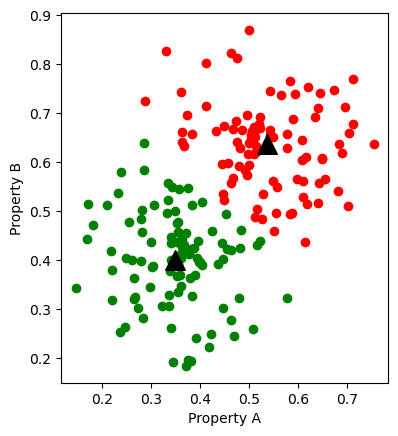

In [115]:
color = ['r','g']
for s in range(nclusters):
    plt.scatter(data[(kmeans.labels_ == s),0],data[(kmeans.labels_ == s),1],marker='o', color=color[s])
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],marker='^', color='k', s=200)
plt.xlabel('Property A')
plt.ylabel('Property B')
plt.gca().set_aspect('equal')
plt.show();

#### <span style="color: red"> Task 1b:</span> Split the data into a training set and a test set (2 marks)

In [117]:
from sklearn import model_selection
training_data, testing_data, training_classes, testing_classes = sklearn.model_selection.train_test_split(data, classes, stratify = classes, random_state = 42)


#### <span style="color: red"> Task 1c:</span> Train a support vector machine (svm) classifier using the training data (3 marks)
Use values of `kernel='rbf'`, `C=100.0` and `gamma=1.0`.

In [42]:
from sklearn.svm import SVC
svm = SVC(kernel='rbf', C=100, gamma=1.0).fit(training_data,training_classes)

#### <span style="color: red"> Task 1e:</span> Calculate the fraction of *training* points correctly classified by your SVM (2 marks)
Your cell should print the result of this calculation.

In [119]:
classes_predicted = svm.predict(training_data)
classes_train = training_classes

print('Percentage correctly classified: ' + str(np.sum(training_classes==classes_predicted)/np.size(classes_train)*100) + '%')
print(training_classes==classes_predicted)

Percentage correctly classified: 100.0%
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True]


#### <span style="color: red"> Task 1f:</span> Calculate the fraction of *test* points correctly classified by your SVM (1 mark)

In [121]:
classes_predicted = svm.predict(testing_data)
classes_test = testing_classes

print('Percentage correctly classified: ' + str(np.sum(testing_classes==classes_predicted)/np.size(classes_test)*100) + '%')
print(testing_classes==classes_predicted)

Percentage correctly classified: 57.99999999999999%
[False False False  True  True  True  True False  True False False False
 False False False False  True  True False  True  True False  True  True
 False False  True  True False False  True False  True  True  True  True
  True  True  True  True False  True  True  True  True False  True  True
  True False]


## Part 2 - Optimsing the SVM

#### <span style="color: red"> Task 2a:</span> Obtain measures of performance for different values of `gamma` (3 marks)
Use a python loop to vary the value of gamma according to the following list `gamma = [1e0, 1e1, 1e2, 1e3, 1e4, 1e5 ]`. For each value of `gamma`, record the fraction of training points classified correctly and the fraction of test points classified correctly.

In [123]:
gamma = [1e0, 1e1, 1e2, 1e3, 1e4, 1e5]

fraction_training = []
fraction_testing = []

for i in range(6):
    svm = SVC(kernel='rbf', C=100, gamma=gamma[i]).fit(training_data,training_classes)
    classes_predict = svm.predict(training_data)
    fraction_training.append(np.sum(training_classes==classes_predict)/np.size(training_classes)*100)
    classes_predict = svm.predict(testing_data)
    fraction_testing.append(np.sum(testing_classes==classes_predict)/np.size(testing_classes)*100)


#### <span style="color: red"> Task 2b:</span> Produce a plot of the performance of the svm on the training and test data as a function of the value of  `gamma` (1 mark)
Think carefully about the best scales to use for your plot.

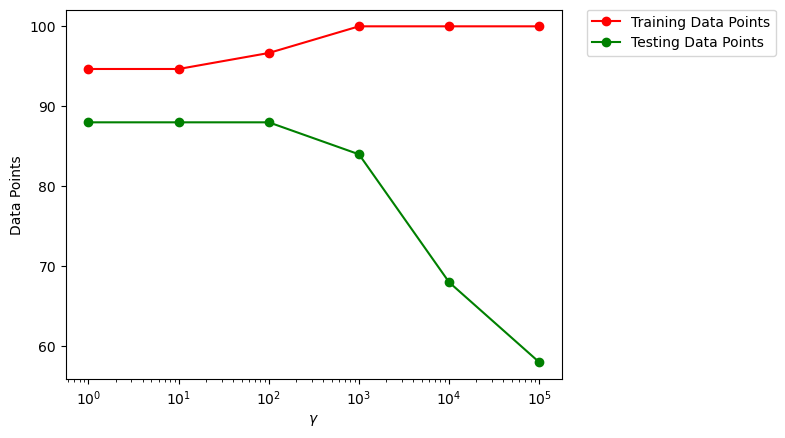

In [125]:
plt.plot(gamma, fraction_training, 'ro-', label='Training Data Points')
plt.plot(gamma, fraction_testing, 'go-', label='Testing Data Points')
plt.xscale('log')
plt.xlabel(r'$\gamma$')
plt.ylabel('Data Points')
plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0.)
plt.show();

#### <span style="color: red"> Task 2c:</span> Which value of `gamma` is optimal (2 marks)
In a markdown cell, state which of the above values of `gamma` you would choose and explain the reason for your choice.

In [68]:
print('Training Data Values:', fraction_training)
print('Testing Data Values:', fraction_testing)

Training Data Values: [94.66666666666667, 94.66666666666667, 96.66666666666667, 100.0, 100.0, 100.0]
Testing Data Values: [88.0, 88.0, 88.0, 84.0, 68.0, 57.99999999999999]


The most optimal gamma value is found from the largest product value obtained from the training data and testing data values. In this case, gamma = 1e2 is chosen as the product of 96.67 and 88.0 gives the largest value.

#### <span style="color: red"> Task 2d:</span> Fit your optimal svm and plot the decision boundary (2 marks)
Refit an svm to your training data using your chosen value for `gamma`, then produce a plot which includes a scatter plot of the test data (coloured according to class) and a line indicating the decision boundary for the svm.

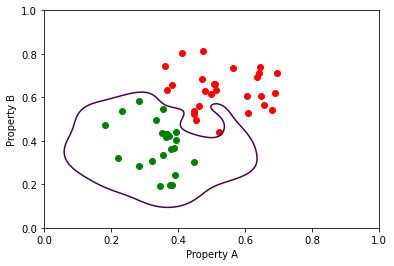

In [21]:
svm = SVC(kernel='rbf', C=100, gamma=1e2).fit(training_data,training_classes)

X1, X2 = np.meshgrid(np.linspace(0, 1, 1000), np.linspace(0, 1, 1000))
X_grid = np.c_[X1.ravel(), X2.ravel()]
decision_values = svm.decision_function(X_grid)
fill_levels = [decision_values.min()] + [0] + [
            decision_values.max()]

for s in range(nclusters):
    plt.scatter(testing_data[(classes_predicted == s),0],testing_data[(classes_predicted == s),1],marker='o', color=color[s])
ax = plt.gca()
ax.contour(X1, X2, decision_values.reshape(X1.shape), levels=[0])
plt.xlabel('Property A')
plt.ylabel('Property B');

## Part 3 - An alternative classifier 

#### <span style="color: red"> Task 3:</span> Explore the use of an alternative classification algorithm (7 marks)
This part of the coursework will explore the use of functionality in Scikit Learn that you have not previously used. By now, you should be comfortable with using online resources to find out how to use new bits of python code. Please read the description of the task carefully and provide all of the output requested in order to achieve full marks.

You should use the `KNeighboursClassifier` to classify your dataset from earlier in the coursework, training with the training set and testing performance on the test set. You will need to explore how the performace varies with parameterisation of the classifier.

You should provide:

- A plot of the fraction of your training and test points correctly classified as a function of the number of neighbours used by the classifier with values ranging from 1 to 20;
- A statement of the optimum value of the number of neighbours for your data, including a brief explanation of your choice;
- A brief explanation of how the nearest-neighbours classifier works. Your explanation should contain no more than 50 words and should consist of complete sentences. This part is to test your ability to express scientific ideas precisely, yet concisely. Answers which have too many words or which are not full sentences will get zero.

In [90]:
from sklearn.neighbors import KNeighborsClassifier

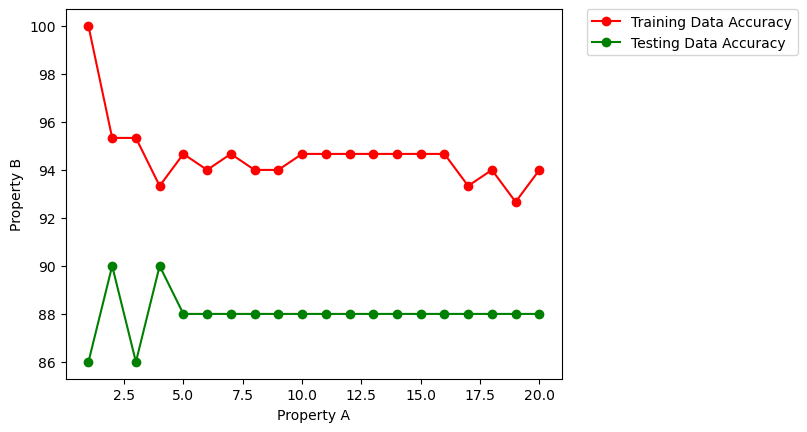

In [104]:
train_classifier = []
test_classifier = []
neighbors_list = []

for i in range(20):
    knc = KNeighborsClassifier(n_neighbors=i+1)
    knc.fit(training_data, training_classes)
    train_classifier_predicted = knc.predict(training_data)
    test_classifier_predicted = knc.predict(testing_data)
    train_accuracy = np.sum(training_classes == train_classifier_predicted) / np.size(training_classes) * 100
    test_accuracy = np.sum(testing_classes == test_classifier_predicted) / np.size(testing_classes) * 100
    train_classifier.append(train_accuracy)
    test_classifier.append(test_accuracy)
    neighbors_list.append(i+1)

plt.plot(neighbors_list, train_classifier, 'ro-', label='Training Data Accuracy')
plt.plot(neighbors_list, test_classifier, 'go-', label='Testing Data Accuracy')
plt.xlabel('Property A')
plt.ylabel('Property B')
plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0.)
plt.show();

In [94]:
print('Training Data Values:', train_classifier)
print('Testing Data Values:', test_classifier)

Training Data Values: [100.0, 95.33333333333334, 95.33333333333334, 93.33333333333333, 94.66666666666667, 94.0, 94.66666666666667, 94.0, 94.0, 94.66666666666667, 94.66666666666667, 94.66666666666667, 94.66666666666667, 94.66666666666667, 94.66666666666667, 94.66666666666667, 93.33333333333333, 94.0, 92.66666666666666, 94.0]
Testing Data Values: [86.0, 90.0, 86.0, 90.0, 88.0, 88.0, 88.0, 88.0, 88.0, 88.0, 88.0, 88.0, 88.0, 88.0, 88.0, 88.0, 88.0, 88.0, 88.0, 88.0]


As similar in Task 2c, the largest product value of training data and testing data gives the optimum value of the neighbor numbers. Hence, the most optimum value is 1 as the largest value is obtained from the product of 100.0 of training data and 86.0 of testing data.

KNN is the simplest algorithim to classify data according to the likeness of the existing data. k parameter is the number of neighbors in closest approximity and it is data-dependent. Once k is defined, the distance is calculated where nearest neighbors are found. The majority voted is labelled.

In [ ]:
# end of coursework